<a href="https://colab.research.google.com/github/Divya170399/TITANIC-ANALYSIS/blob/main/TITANIC_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [27]:
df=pd.read_csv(r"/content/titanic-dataset.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df.head(50)
print("number of passengers in original data:" +str(len(df.index)))

number of passengers in original data:891


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


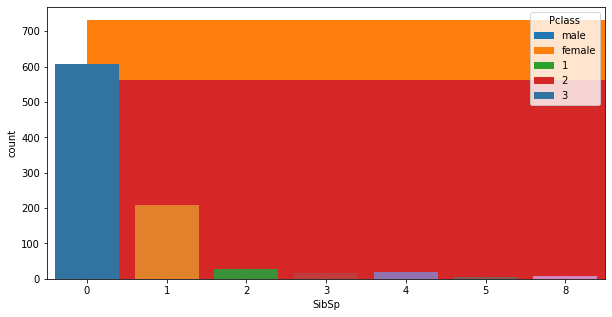

In [29]:
#ANALYSING DATA
sns.countplot(x="Survived", data=df)
sns.countplot(x="Survived", hue="Sex" , data=df)
sns.countplot(x="Survived", hue="Pclass" , data=df)
df["Age"].plot.hist()
df["Fare"].plot.hist()
df["Age"].plot.hist(bins=20, figsize=(10,5))
df["Fare"].plot.hist(bins=20, figsize=(10,5))
df.info()
sns.countplot(x="SibSp", data=df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


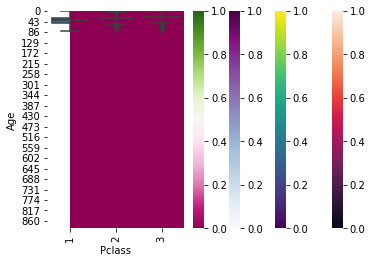

In [30]:
#DATA WRANGLING
df.isnull()
df.isnull().sum()
sns.heatmap(df.isnull())
sns.heatmap(df.isnull() , cmap="viridis")
sns.heatmap(df.isnull() , cmap="BuPu")
sns.heatmap(df.isnull() , cmap="PiYG")
sns.boxplot(x="Pclass" , y="Age" , data=df)
df.head(5)

In [31]:
df.drop("Cabin" , axis=1 , inplace=True)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


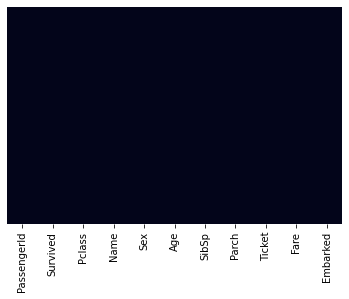

In [32]:

df.dropna(inplace=True)
sns.heatmap(df.isnull() , yticklabels=False , cbar=False)


In [33]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [34]:
#converting variables to dummy variables(0=not female/male,1=female/male)
pd.get_dummies(df["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [35]:
pd.get_dummies(df["Sex"] , drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


In [36]:
embark=pd.get_dummies(df["Embarked"])
embark.head(5)
embark=pd.get_dummies(df["Embarked"] , drop_first=True)
embark.head(5)
embark=pd.get_dummies(df["Embarked"] , drop_first=True)
embark.head(5)
pcl=pd.get_dummies(df["Pclass"] , drop_first=True)
pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [45]:
#TRAIN DATA
#X is an independent var and y is dependent
X=df.drop("Survived",axis=1)
y=df["Survived"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predictions=logmodel.predict(X_test)
from sklearn.metrics import classification_report
classification_report(y_test , predictions)

'              precision    recall  f1-score   support\n\n           0       0.65      0.92      0.76       126\n           1       0.72      0.30      0.42        88\n\n    accuracy                           0.66       214\n   macro avg       0.69      0.61      0.59       214\nweighted avg       0.68      0.66      0.62       214\n'

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test , predictions)


array([[116,  10],
       [ 62,  26]])

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , predictions)


0.6635514018691588